<a href="https://colab.research.google.com/github/franchaise/project/blob/main/credit_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from scipy.io import arff
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [2]:

drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
data_file_path = '/content/drive/MyDrive/credit_project/dataset.arff'

In [9]:
data_arff, meta = arff.loadarff(data_file_path)

data_df = pd.DataFrame(data_arff)

print(data_df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [11]:
pd.options.display.max_columns = None

In [12]:
#Checking for missing values
missing_values = data_df.isna().sum()
print(missing_values)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [13]:
data_df.shape

(284807, 31)

In [14]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [15]:
data_df['Class'] = data_df['Class'].astype(int)

In [16]:
data_df.duplicated().sum()

1081

In [17]:
data_df.drop_duplicates(inplace=True)

In [18]:

print(data_df.describe())



                Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean    94811.077600       0.005917      -0.004135       0.001613   
std     47481.047891       1.948026       1.646703       1.508682   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54204.750000      -0.915951      -0.600321      -0.889682   
50%     84692.500000       0.020384       0.063949       0.179963   
75%    139298.000000       1.316068       0.800283       1.026960   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.002966       0.001828      -0.001139       0.001801   
std         1.414184       1.377008       1.331931       1.227664   
min        -5.683171    -113.743307     -26.160506     -43.557242   
25%        -0.850134      -0.6898

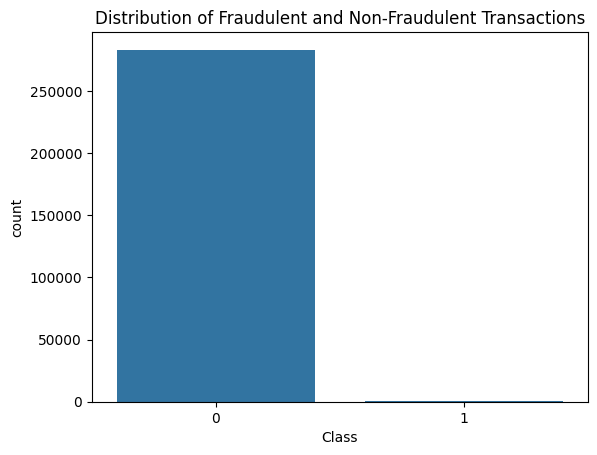

In [ ]:


sns.countplot(x='Class', data=data_df)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.show()

In [22]:
fraud = data_df[data_df['Class']== 1]
legit = data_df[data_df['Class']== 0]

In [23]:
print(fraud.shape,legit.shape)

(473, 31) (283253, 31)


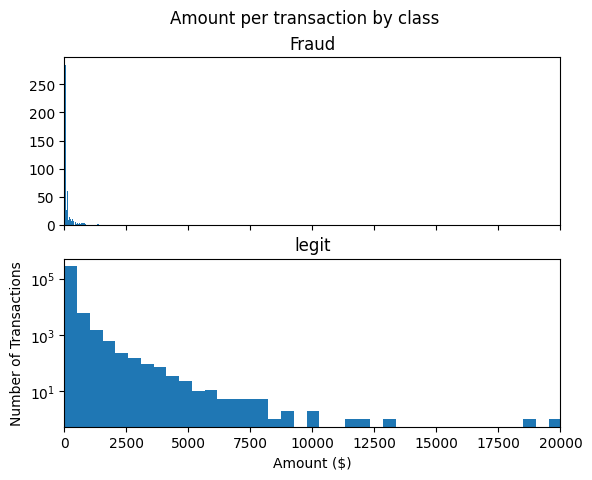

In [24]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(legit.Amount, bins = bins)
ax2.set_title('legit')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

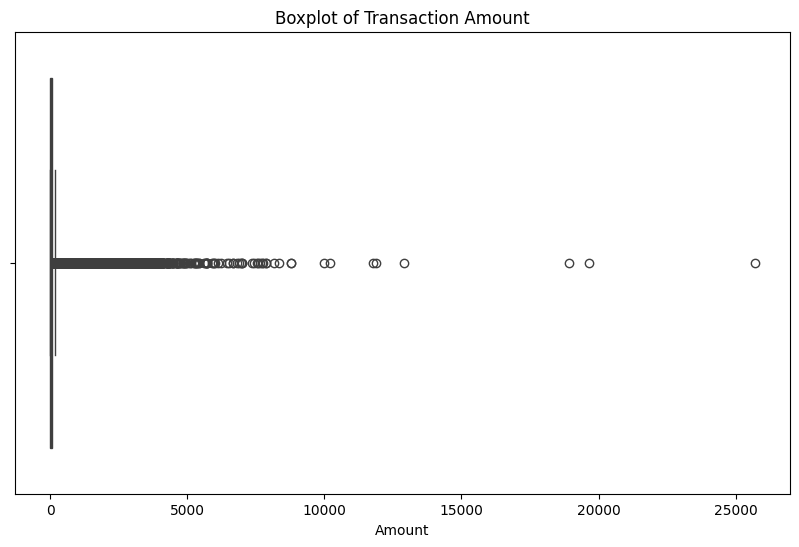

In [26]:
# Boxplot for Amount to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_df['Amount'])
plt.title('Boxplot of Transaction Amount')
plt.xlabel('Amount')
plt.show()

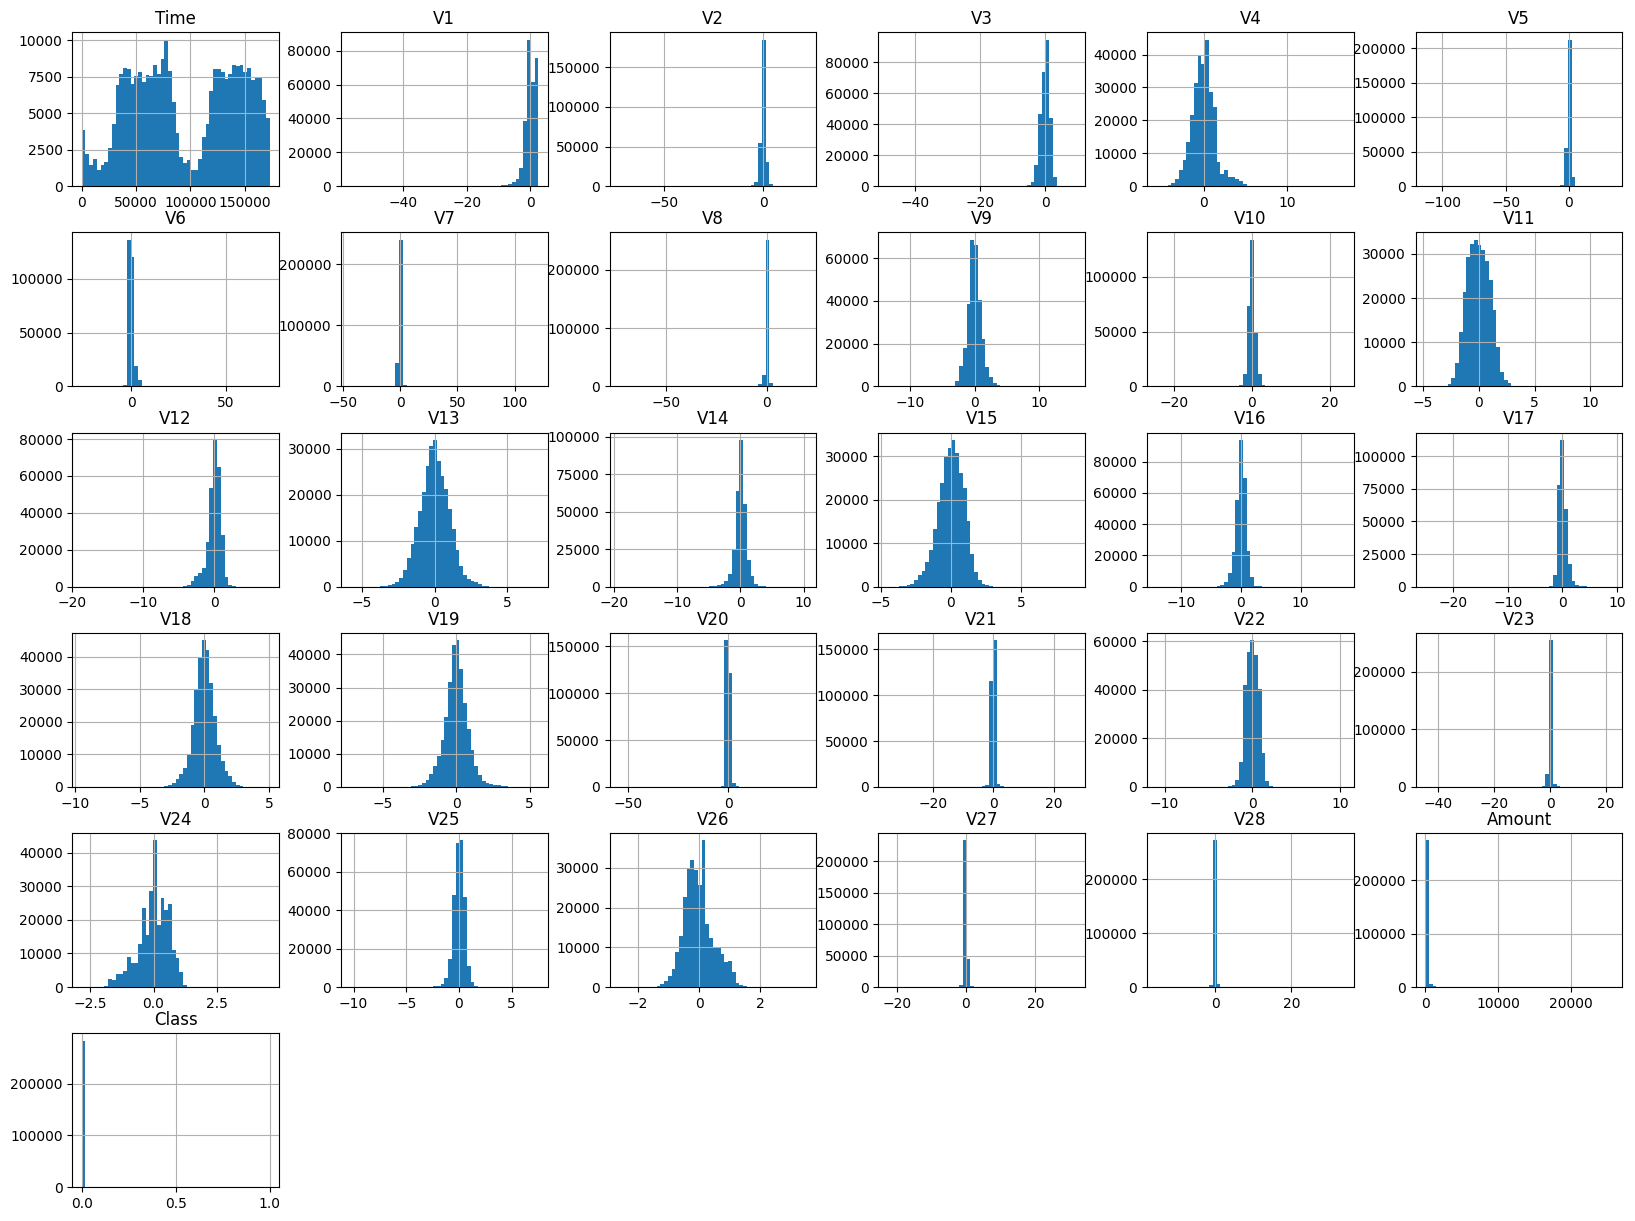

In [27]:
data_df.hist(bins=50, figsize=(20,15))
plt.show()

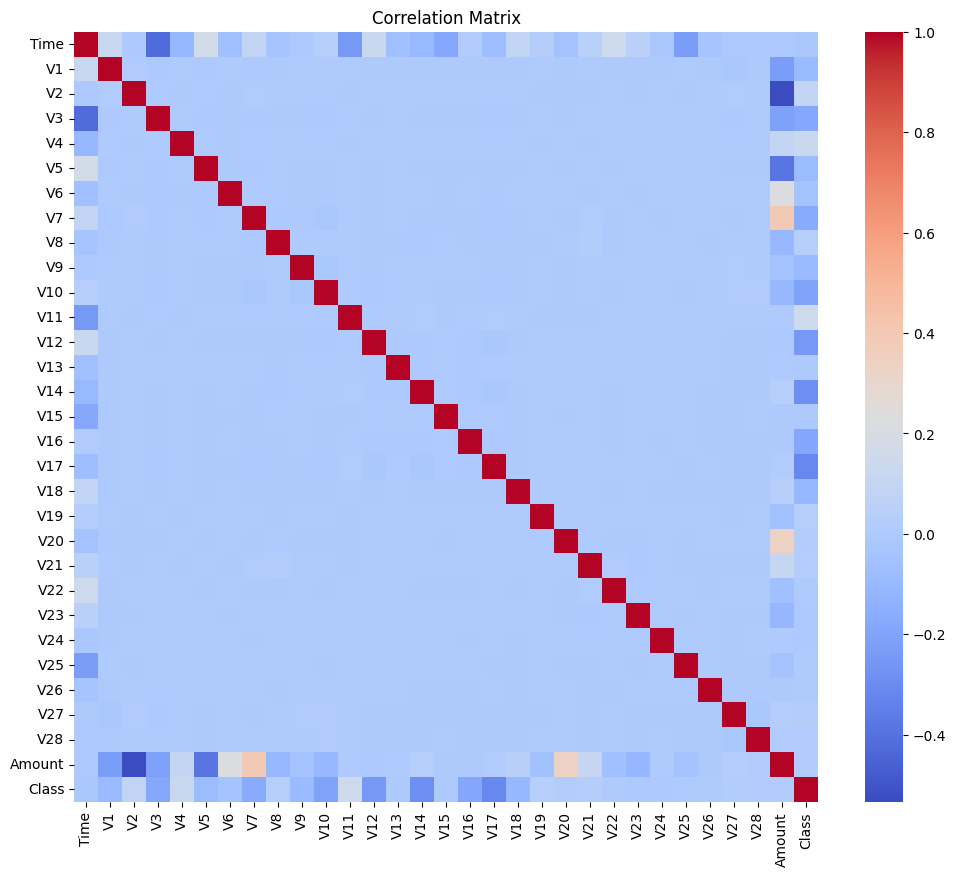

In [29]:
# Correlation analysis
corr = data_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

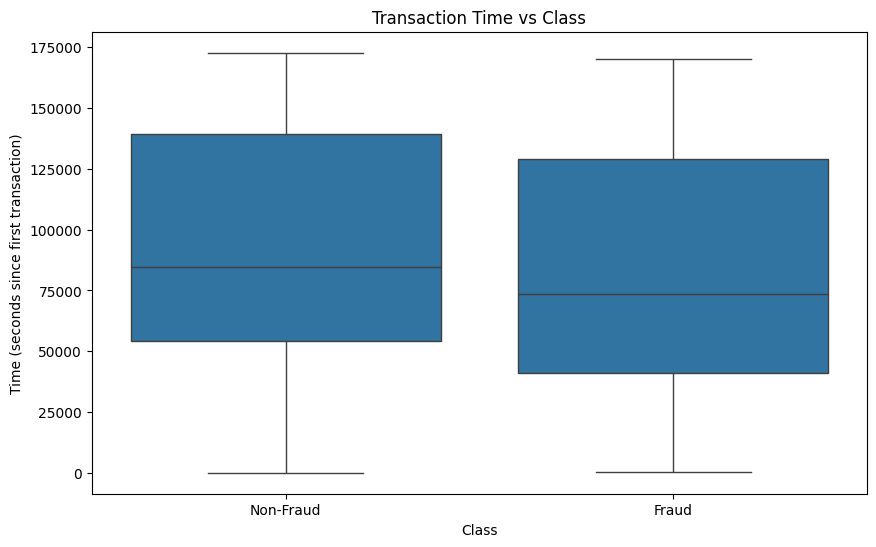

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Time', data=data_df)
plt.title('Transaction Time vs Class')
plt.xlabel('Class')
plt.ylabel('Time (seconds since first transaction)')
plt.xticks(range(2), ['Non-Fraud', 'Fraud'])
plt.show()

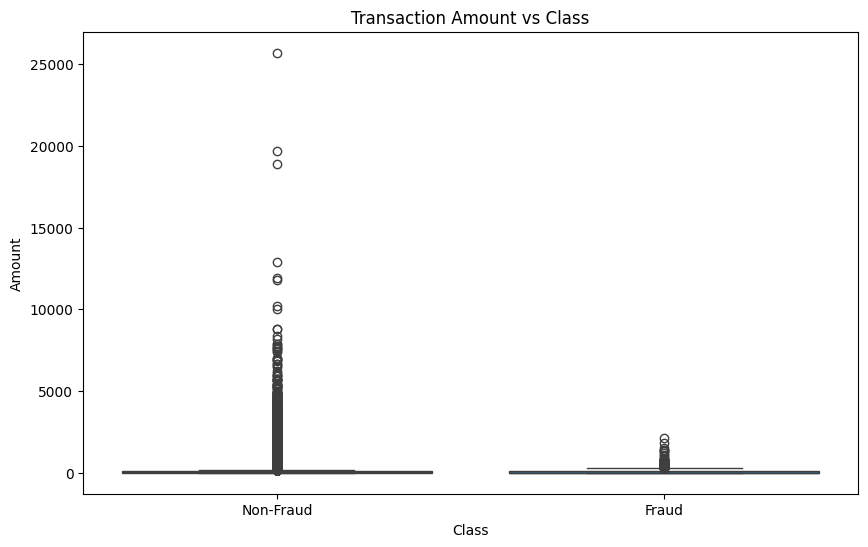

In [33]:
# Analyzing Amount vs. Class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=data_df)
plt.title('Transaction Amount vs Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.xticks(range(2), ['Non-Fraud', 'Fraud'])
plt.show()

# Predicitve phase
